In [3]:
import ee

ee.Authenticate()
ee.Initialize()


Successfully saved authorization token.


In [4]:
# 画像取得したいポリゴン座標
coords = [[
    [141.532745,42.983993],
    [141.532745,42.998056],
    [141.567507,42.998056],
    [141.567507,42.983993],
    [141.532745,42.983993]
]]

# 対象期間（開始）
START_DATE ='2021-07-01'
# 対象期間（終了）
END_DATE = '2021-7-30'
# 雲被覆率フィルタリングの上限値
CLOUD_COVER_RATE = 30

# ImageCollectionの絞り込み
imgcol = (
    ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED')
    .filterBounds(ee.Geometry.Polygon(coords))
    .filterDate(ee.Date(START_DATE), ee.Date(END_DATE))
    .filter(ee.Filter.lte('CLOUDY_PIXEL_PERCENTAGE',CLOUD_COVER_RATE))
)

# ImageCollectionに格納されているImageIDのリスト化と確認
asset_id_list = imgcol.aggregate_array('system:id').getInfo()
print(asset_id_list)

# 画像をGoogleDrive内に出力
for i,asset_id in enumerate(asset_id_list):
    task = ee.batch.Export.image.toDrive(
        image = ee.Image(asset_id_list[i]).select(['TCI_R','TCI_G','TCI_B']),
        region = ee.Geometry.Polygon(coords),
        description = 'Sample'+str(i),
    )
    task.start()

['COPERNICUS/S2_SR_HARMONIZED/20210716T012701_20210716T012658_T54TWN', 'COPERNICUS/S2_SR_HARMONIZED/20210721T012659_20210721T012657_T54TWN', 'COPERNICUS/S2_SR_HARMONIZED/20210726T012701_20210726T012658_T54TWN']


In [5]:
# NDVI画像を得る関数
def get_ndvi(asset_id):
    ndvi = (
        ee.Image(asset_id_list[i])
        .normalizedDifference(['B8','B4'])
        .rename('ndvi')
    )
    return ndvi

# 画像をGoogleDrive内に出力
for i,asset_id in enumerate(asset_id_list):
    task = ee.batch.Export.image.toDrive(
        image = get_ndvi(asset_id_list[i]),
        region = ee.Geometry.Polygon(coords),
        description = 'Sample_NDVI_' + str(i),
        folder = 'ExportGEEimage',
        crs = 'EPSG:6680'
    )
    task.start()

In [6]:
# 北海道全体
coords = [[
    [139.28068234072498,45.61288802634019],
    [139.28068234072498,41.33761007359226],
    [145.83791737901754,41.33761007359226],
    [145.83791737901754,45.61288802634019],
    [139.28068234072498,45.61288802634019]
]]
# 対象期間（開始）
START_DATE ='2021-06-26'
# 対象期間（終了）
END_DATE = '2021-6-27'
# 雲被覆率フィルタリングの上限値
CLOUD_COVER_RATE = 100
# ImageCollectionの絞り込み
imgcol_hokkaido = (
    ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED')
    .filterBounds(ee.Geometry.Polygon(coords))
    .filterDate(ee.Date(START_DATE), ee.Date(END_DATE))
    .filter(ee.Filter.lte('CLOUDY_PIXEL_PERCENTAGE',CLOUD_COVER_RATE))
)
# ImageCollectionに格納されているasset idのリスト化と確認
asset_id_list_hokkaido = imgcol_hokkaido.aggregate_array('system:id').getInfo()
print(asset_id_list_hokkaido)

['COPERNICUS/S2_SR_HARMONIZED/20210626T012701_20210626T012656_T54TUL', 'COPERNICUS/S2_SR_HARMONIZED/20210626T012701_20210626T012656_T54TUM', 'COPERNICUS/S2_SR_HARMONIZED/20210626T012701_20210626T012656_T54TUN', 'COPERNICUS/S2_SR_HARMONIZED/20210626T012701_20210626T012656_T54TVL', 'COPERNICUS/S2_SR_HARMONIZED/20210626T012701_20210626T012656_T54TVM', 'COPERNICUS/S2_SR_HARMONIZED/20210626T012701_20210626T012656_T54TVN', 'COPERNICUS/S2_SR_HARMONIZED/20210626T012701_20210626T012656_T54TVP', 'COPERNICUS/S2_SR_HARMONIZED/20210626T012701_20210626T012656_T54TVQ', 'COPERNICUS/S2_SR_HARMONIZED/20210626T012701_20210626T012656_T54TVR', 'COPERNICUS/S2_SR_HARMONIZED/20210626T012701_20210626T012656_T54TWL', 'COPERNICUS/S2_SR_HARMONIZED/20210626T012701_20210626T012656_T54TWM', 'COPERNICUS/S2_SR_HARMONIZED/20210626T012701_20210626T012656_T54TWN', 'COPERNICUS/S2_SR_HARMONIZED/20210626T012701_20210626T012656_T54TWP', 'COPERNICUS/S2_SR_HARMONIZED/20210626T012701_20210626T012656_T54TWQ', 'COPERNICUS/S2_SR_H

In [7]:
task = ee.batch.Export.image.toDrive(
    image = imgcol_hokkaido.mosaic().select(['TCI_R','TCI_G','TCI_B']),
    region = ee.Geometry.Polygon(coords),
    description = 'mosaic-hokkaido-210626',
    scale = 1000,
    folder = 'ExportGEEimage',
    crs = 'EPSG:3857'
)
task.start()

In [9]:
# 撮影日リストの取得関数
def get_shootingdate_list(imagecollection):
    shootingdate_list = (
        ee.List(imagecollection.aggregate_array('system:time_start'))
        .map(lambda d : ee.Date(d).format('YYYY-MM-dd'))
        .distinct()
    )
    return shootingdate_list.getInfo()

# 北海道岩見沢北部
coords = [ [
    [ 141.670111347456071, 43.240753223293339 ], 
    [ 141.670111347456071, 43.372441787167176 ], 
    [ 141.872121150271028, 43.372441787167176 ], 
    [ 141.872121150271028, 43.240753223293339 ], 
    [ 141.670111347456071, 43.240753223293339 ] 
]]
# 対象期間（開始）
START_DATE ='2021-06-1'
# 対象期間（終了）
END_DATE = '2021-06-30'
# 雲被覆率フィルタリングの上限値
CLOUD_COVER_RATE = 100

# ImageCollectionの絞り込み
imgcol_north_iwamizawa = (
    ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED')
    .filterBounds(ee.Geometry.Polygon(coords))
    .filterDate(ee.Date(START_DATE), ee.Date(END_DATE))
    .filter(ee.Filter.lte('CLOUDY_PIXEL_PERCENTAGE',CLOUD_COVER_RATE))
)

shootingdate_list = get_shootingdate_list(imgcol_north_iwamizawa)
print(shootingdate_list)

['2021-06-01', '2021-06-06', '2021-06-11', '2021-06-16', '2021-06-21', '2021-06-26']


In [10]:
# トゥルーカラー画像取得関数
def get_tc_image(ImageCollection,shootingdate):
    tc_image = (
        ImageCollection
        .filterDate(
            ee.Date(shootingdate),
            ee.Date(shootingdate).advance(1,'day')
        )
        .mean()
        .select(['TCI_R','TCI_G','TCI_B'])
        .clip(ee.Geometry.Polygon(coords))
    )
    return tc_image

for shootingdate in shootingdate_list:
    task = ee.batch.Export.image.toDrive(
        image = get_tc_image(imgcol_north_iwamizawa,shootingdate),
        description = 'TC_' + shootingdate,
        scale = 10,
        folder = 'ExportGEEimage',
        crs = 'EPSG:3857'
    )
    task.start()

In [11]:
# NDVI画像取得関数
def get_ndvi_image(ImageCollection,shootingdate):
    ndvi_image = (
        ImageCollection
        .filterDate(
            ee.Date(shootingdate),
            ee.Date(shootingdate).advance(1,'day')
        )
        .select(['B8','B4'])
        .mean()
        .normalizedDifference(['B8','B4'])
        .rename('ndvi')
        .clip(ee.Geometry.Polygon(coords))
    )
    return ndvi_image

# 北海道北見西部
coords = [[
    [143.6958165290913,43.75185911991238],
    [143.67532544734632,43.75054584331872],
    [143.67653748914984,43.74050379689294],
    [143.69721795242714,43.74187202222956],
    [143.6958165290913,43.75185911991238]
]]
# 対象期間（開始）
START_DATE ='2021-06-01'
# 対象期間（終了）
END_DATE = '2021-07-30'
# 雲被覆率フィルタリングの上限値
CLOUD_COVER_RATE = 20

# ImageCollectionの絞り込み
imgcol = (
    ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED')
    .filterBounds(ee.Geometry.Polygon(coords))
    .filterDate(ee.Date(START_DATE), ee.Date(END_DATE))
    .filter(ee.Filter.lte('CLOUDY_PIXEL_PERCENTAGE',CLOUD_COVER_RATE))
)

# 撮影日リストの取得
shootingdate_list = get_shootingdate_list(imgcol)
print(shootingdate_list)

# 緯度・経度情報に基づき解析するためCRSはEPSG:4326を指定しておく
for shootingdate in shootingdate_list:
    task = ee.batch.Export.image.toDrive(
        image = get_ndvi_image(imgcol,shootingdate),
        description = 'NDVI_'+shootingdate,
        scale = 10,
        folder = 'ExportGEEimage',
        crs = 'EPSG:4326'
    )
    task.start()

['2021-06-01', '2021-06-06', '2021-06-13', '2021-06-23', '2021-06-26', '2021-06-28', '2021-07-18', '2021-07-23', '2021-07-26', '2021-07-28']


In [22]:
from rasterstats import zonal_stats

# ラスタおよびベクタファイルの保存フォルダパス（絶対パス）
BASE_DIR = 'data'
# ベクタファイル名
VECTOR_FILE_NAME = "polygon.geojson"
# ラスタファイル名
RASTER_FILE_NAME = "NDVI_2021-06-01.tif"

# rasterstatsのzonal_stats関数を実行
usage = zonal_stats(
    VECTOR_FILE_NAME,
    BASE_DIR + "/" + RASTER_FILE_NAME
    )
print(usage)

[{'min': 0.6368260383605957, 'max': 0.9258373379707336, 'mean': 0.9115601601497504, 'count': 601}, {'min': 0.5022624731063843, 'max': 0.8601797223091125, 'mean': 0.6233322596786046, 'count': 606}]


In [24]:
import glob
geotiff_paths = glob.glob(BASE_DIR + '/*.tif')
print(geotiff_paths)

['data/NDVI_2021-07-28.tif', 'data/NDVI_2021-06-26.tif', 'data/NDVI_2021-06-23.tif', 'data/NDVI_2021-06-13.tif', 'data/NDVI_2021-06-06.tif', 'data/NDVI_2021-06-01.tif', 'data/NDVI_2021-06-28.tif', 'data/NDVI_2021-07-26.tif', 'data/NDVI_2021-07-18.tif', 'data/NDVI_2021-07-23.tif']


In [30]:
import fiona

# NDVI値を辞書形式で出力するための初期化
ndvi_dict = {}

# 衛星画像のファイルパスを取得
for geotiff_path in geotiff_paths:
    # 衛星画像のファイルパスからファイル名を抜き出し
    geotiff_filename = geotiff_path.split('/')[-1][:-4]

    # rasterstats.zonal_statsの実行（注意点：ラスターとベクターのCRSは一致していること）
    stats = zonal_stats(
        BASE_DIR + '/' + VECTOR_FILE_NAME,
        geotiff_path
    )

    # シェープファイルからポリゴンnameを抜き出し
    with fiona.open(BASE_DIR + '/' + VECTOR_FILE_NAME, "r") as shapefile:
        polygon_id_list = [i['properties']['name'] for i in shapefile]

    # ndvi_dictに'date'キーが無い場合、キーに'name'を、値に空配列を設定
    if 'date' not in ndvi_dict.keys():
        ndvi_dict['date'] = []

    # GeoTIFFファイル名から撮影日を抜き出し（衛星画像出力時に撮影日をファイル名の一部としていた）
    shooting_date = geotiff_filename.split('_')[-1]
    # 撮影日を配列に追加
    ndvi_dict['date'].append(shooting_date)

    # シェープファイルのポリゴンidとrasterstats.zonal_statsの実行結果を繰り返し処理
    for id, mean in zip(polygon_id_list,stats):
        # ndvi_dictにid値のキーが無い場合、キーにid値を、値に空配列を設定
        if id not in ndvi_dict.keys():
            ndvi_dict[id] = []

        # ndvi_dictのnameをキーとして、値を配列に追加
        ndvi_dict[id].append(float('{:.3f}'.format(mean['mean'])))

print(ndvi_dict)

{'date': ['2021-07-28', '2021-06-26', '2021-06-23', '2021-06-13', '2021-06-06', '2021-06-01', '2021-06-28', '2021-07-26', '2021-07-18', '2021-07-23'], 'A': [0.811, 0.331, 0.665, 0.889, 0.888, 0.912, 0.325, 0.816, 0.712, 0.778], 'B': [0.415, 0.86, 0.874, 0.791, 0.705, 0.623, 0.845, 0.394, 0.358, 0.33]}


In [31]:
import pandas as pd

# Pandasデータフレームの作成
df = pd.DataFrame(ndvi_dict).sort_values('date')
# csvデータでの出力
df.to_csv('data.csv')

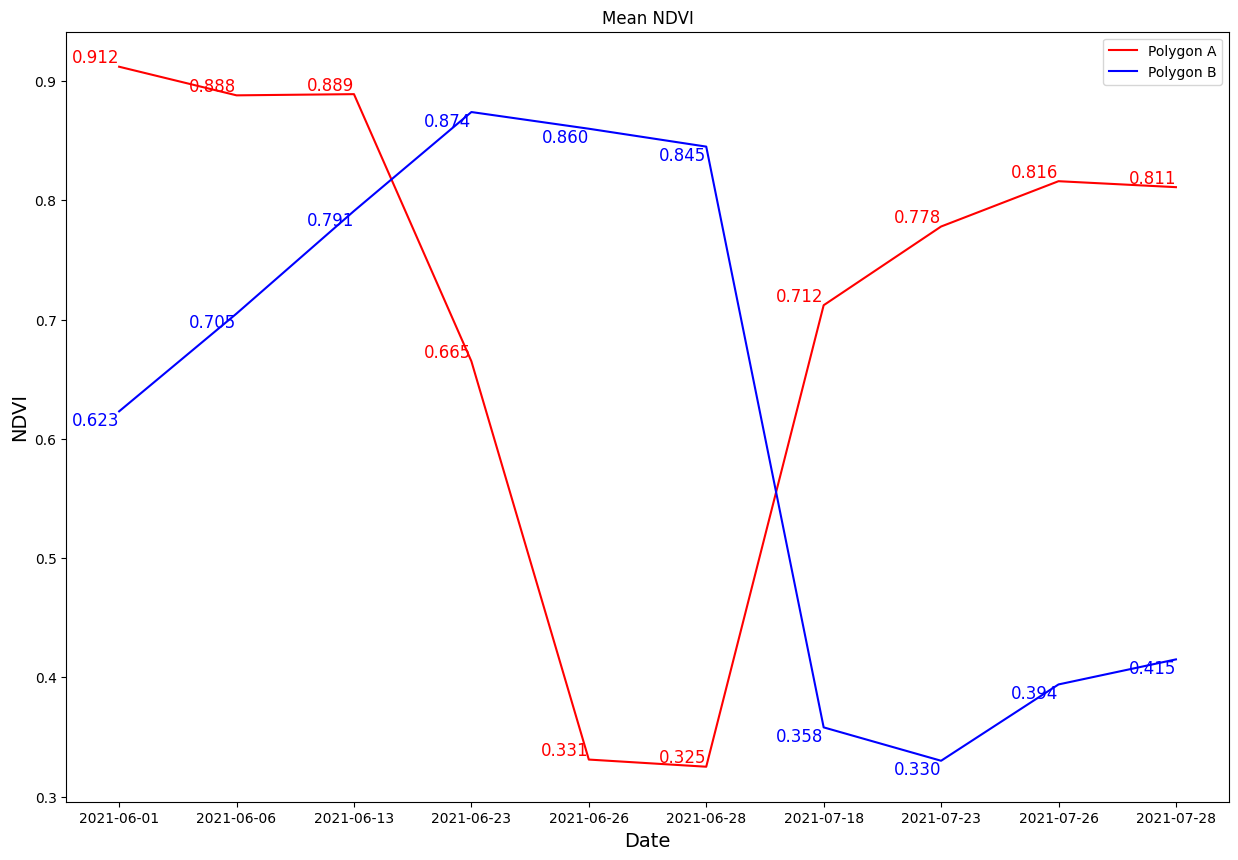

In [36]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))

plt.plot(df['date'], df['A'], color="red")
plt.plot(df['date'], df['B'], color="blue")

# データポイントの値を表示
for i, row in df.iterrows():
    plt.text(row['date'], row['A'], f'{row["A"]:.3f}', ha='right', va='bottom', fontsize=12, color='red')
    plt.text(row['date'], row['B'], f'{row["B"]:.3f}', ha='right', va='top', fontsize=12, color='blue')

plt.title('Mean NDVI')
plt.ylabel('NDVI', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(['Polygon A', 'Polygon B'])
plt.show()